# Gün 3 bölüm 1: Stokastik modeller

<div style="background: #f8f9fa; padding: 0.5rem 1rem; border-radius: 8px; margin-bottom: 1rem; border-left: 4px solid #007bff;">
<a href="../../index.ipynb" style="text-decoration: none; color: #007bff; font-weight: bold;">← Kurs Dizinine Geri Dön</a> | 
<a href="../../index-tr.ipynb" style="text-decoration: none; color: #dc3545; font-weight: bold;">🇹🇷 Türkçe Index</a>
</div>

---

Bu pratikte stokastiklik, salgın kalıcılığı ve sönme olasılığı hakkındaki bazı kavramları uygulayacağız. Bu amaçla binomial dağılımı keşfetmeye ve R'de bir dağılımdan nasıl örnekleme yapabileceğimizi öğrenmeye başlayacağız.

## Neden binomial dağılıma ihtiyacımız var?

İstatistik ve olasılık teorisinde, belirli olay özelliklerini istatistiksel bir dağılımla ilişkilendirme eğilimindeyiz. Örneğin, popülasyon vücut ağırlığının Normal dağılım izlediğini güvenle söyleyebiliriz. Normal dağılım süreklidir (ağırlığınız 74Kg veya 74.37kg olabilir ve dağılımın parçası olabilir) ve bir ortalama ve standart sapma ile tanımlanır, bu da merkezi ölçüyü ve verilerin yayılımını yansıtır. Örneğin, şöyle deriz:

$$
Ağırlık \sim Normal(72.5,5)  
$$

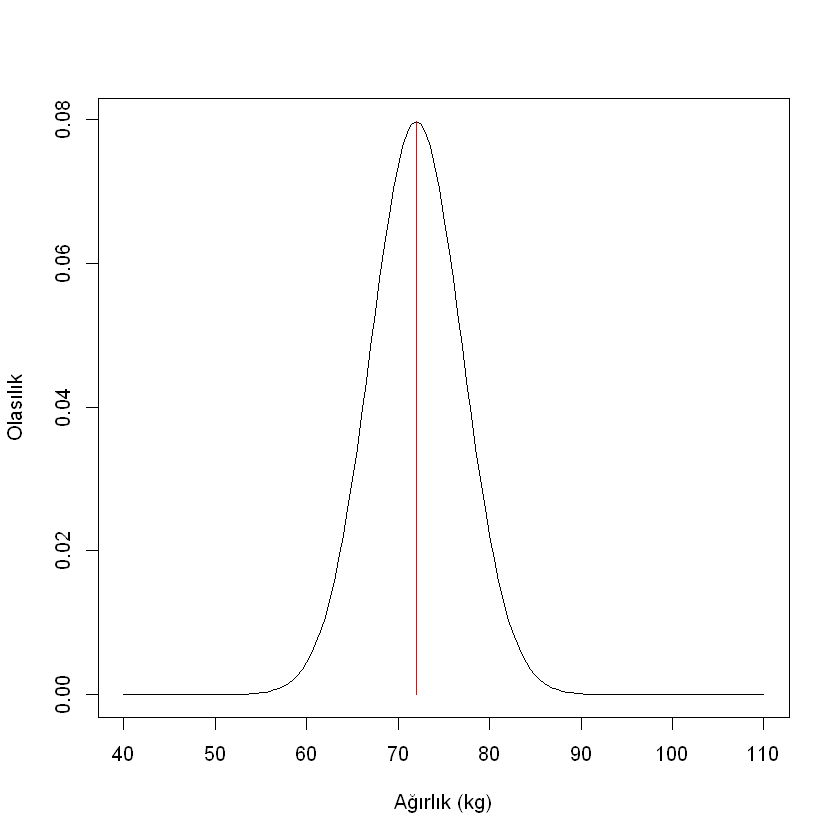

In [1]:
x <- seq(40, 110, by = .5)

y <- dnorm(x, mean = 72, sd = 5)

plot(x,y,type = "l", xlab = "Ağırlık (kg)", ylab = "Olasılık")
lines(c(72,72),c(0,max(y)),col="red")


Öte yandan Binomial dağılım, bir dizi deneydeki başarı sayısının ayrık olasılık dağılımıdır. Bir parayı birkaç kez çevirmek ve sonuçta kaç kez yazı geleceğini saymak hakkında düşünün. Binomial dağılım *n* (deneme sayısı) ve *p* (başarı olasılığı) parametrelerini alır. Para atma örneğimizi sürdürürsek, paranın adil olması durumunda başarı olasılığının (yazı gelme) %50 olduğunu söyleyebiliriz. Bu, parayı yeterince çok attığımızda başarı sayısının %50'ye yaklaşması gerektiği anlamına gelir.

Önemlisi, 1 denemelik binomial deneylerden (parayı sadece bir kez atmak) bahsettiğimizde *Bernoulli* denemelerinden bahsederiz. 1'den fazla deneme için binomial dağılımdan bahsederiz.

Bunu R kullanarak deneyelim. R'de, temel *rbinom* fonksiyonu bu tür deneyleri hesaplamak için kullanılır. *rbinom* gözlem sayısı için *n*, deneme sayısı için *size* ve başarı olasılığı için *prob* parametrelerini alır. Aşağıdaki kodu çalıştırın:

In [2]:
# Parayı bir kez atalım (Bernoulli)
rbinom(n=1,size=1,prob=0.5)

# Şimdi 100 deneme yapalım
rbinom(n=1,size=100,prob=0.5)

[1] 0

[1] 52

a)  Parayı 100 kez attığınızda kaç başarı elde ettiniz?

b)  Deneme sayınızı artırırsanız ne olur?

**Cevap: Tahmin %50'ye çok daha yakın (örneklem büyüklüğünde artış)**

Ama bu kurs için daha alakalı bir vaka inceleyelim. Artık binomial dağılımı bildiğinize göre, binomial olasılığın enfeksiyon bulaşma süreci için nasıl alakalı olduğunu görebilirsiniz. Şu ana kadar, önceki derslerimizde bulaşmanın en az üç faktöre bağlı olduğunu öğrendik:

Bulaşma olasılığı $$\beta $$, enfeksiyon prevalansı $$\frac{I}{N} $$, ve bulaştırıcılık dönemi süresi $$D $$.

Daha önce incelediğimiz gibi, herhangi bir zaman noktasında yeni enfeksiyon sayısı (*Y*) şu şekilde tanımlanabilir: $$
Y = S\frac{\beta I}{N}
$$ Burada *S* duyarlı birey sayısıdır. Deterministik görüşte, değişkenlerimiz ve parametrelerimiz aynı olduğu sürece, bu her zaman aynı sayıyı üretecektir. Ancak daha önce öğrendiğimiz gibi, enfeksiyon süreci rastgelelik içerir.

*Binomial* denemelerini geri getirmek için, enfeksiyon sürecimizi bu çerçeveye nasıl sığdırabileceğimizi görebiliriz. Belirli bir noktada, enfeksiyon prevalansının diyelim ki %10 olduğu ve *beta* = 0.2 olduğunu bildiğimiz durumda, enfeksiyon olasılığının 0.1 x 0.2 olduğunu söyleyebiliriz. Bu dağılımdaki deneme sayısı duyarlı sayıdır. Stokastik olayları hesaba katarak enfeksiyon sayısını tahmin etmek için aşağıdaki kodu uyarlamaya çalışın:

In [ ]:
# Parametrelerimizi tanımla
R0 <- 2     # Temel üreme sayısı
gamma<- 0.1 # iyileşme oranı
beta<-  0.2 # <- R0 formülünden beta'yı bulabilir misin?
prevalence <- 0.1 # Enfeksiyon prevalansı (I/N)
S <- 1000 # t zamanında duyarlı bireyler  

n_trials <- S
probability_of_infection<-beta * prevalence 

# Yeni enfeksiyon sayısı Y'yi tahmin etmek için binomial dağılımdan çek 
Y<-rbinom(n=1,size= n_trials ,prob=probability_of_infection)  

print(paste("yeni enfeksiyon sayısı",Y))


**Cevap: Tahmin edilen enfeksiyon sayısı ~14'tür (stokastik bir süreç olduğu için değişecektir)**

Artık enfeksiyon sürecindeki stokastikliğin basit R komutlarıyla nasıl ifade edilebileceği konusunda daha iyi bir fikrimiz olduğuna göre, stokastik bir model formüle etmeyi deneyelim.

### *Teknik Parantez:*

Stokastik model R'de farklı yaklaşımlarla kodlanabilir. *Odin* adlı bir paket kullanacağız. Bu amaç için diğer paketler veya hatta temel R kullanılabilir, ancak *Odin*'in bize ayrık stokastik sürecin yapısının çok düzenli bir görünümünü verdiğine inanıyorum (Odin paketi hakkında daha fazla bilgi için [buraya](https://mrc-ide.github.io/odin/index.html) bakın).

## Stokastik model formüle etmek

Toplumunuzda yeni bir viral hastalık ("X" hastalığı) tespit edildi. Şu ana kadar toplanan sürveyans verilerinden birkaç parametre tahmin edildi. İlk R0 yaklaşık 2 olarak tahmin edildi ve semptom başlangıcından iyileşmeye kadar geçen süre ortalama 8 gün. Ayrıca "X" hastalığının önceki salgınlarında enfeksiyon yoluyla kazanılan bağışıklığın medyan ömrünün 3 ay olduğu da not edildi.

Aşağıdaki kod bir SIR stokastik modeli tanımlar. 1. Boşlukları (*??* sembolüyle işaretli) doldurmaya çalışın ve stokastik olayların enfeksiyon sürecine nasıl dahil edildiğine dikkat edin:

In [4]:

library(odin)
library(ggplot2)
library(reshape2)

sir_generator <- odin::odin({
  ## Bölmeler arası geçişler için temel denklemler:
  update(S) <- S - n_SI + n_RS # Duyarlı
  update(I) <- I + n_SI - n_IR # Bulaştırıcı
  update(R) <- R + n_IR - n_RS # İyileşen
  
  ## Bireysel geçiş olasılıkları:
  p_SI <- 1 - exp(-beta * I / N) # S'den I'ya
  p_IR <- 1 - exp(-gamma)        # I'den R'ya
  p_RS <- 1 - exp(-delta)        # R'den S'ye
  
  ## Bölmeler arası değişen sayıları tanımlamak için binomial dağılımlardan çek:
  n_SI <- rbinom(S, p_SI) # Yeni enfeksiyonlar
  n_IR <- rbinom(I, p_IR) # Yeni iyileşenler 
  n_RS <- rbinom(R, p_RS) # Yeni bağışıklık kaybedenler 
  
  ## Toplam popülasyon büyüklüğü
  N <- S + I + R
  
  # Beta'yı R0 terimlerinde tanımla
  beta <- R0 * gamma #<------------------------- Beta'yı R0 cinsinden tanımlayabilir misin? 

  ## Başlangıç durumları:
  initial(S) <- S_ini
  initial(I) <- I_ini
  initial(R) <- 0
  
  ## Kullanıcı tanımlı parametreler - parantez içinde varsayılan:
  S_ini <- user()
  I_ini <- user()
  R0    <- user()
  gamma <- user()
  delta <- user()
  
}, verbose = FALSE)


Loading required namespace: pkgbuild



Soru işaretli boşlukları doldurduysanız, şimdi,

2.  Model parametrelerini tanımlayın ve sonuçları görmek için modelinizi çalıştırın.

Modelinizi çalıştırdıktan sonra, şimdi bir grafik görmelisiniz.

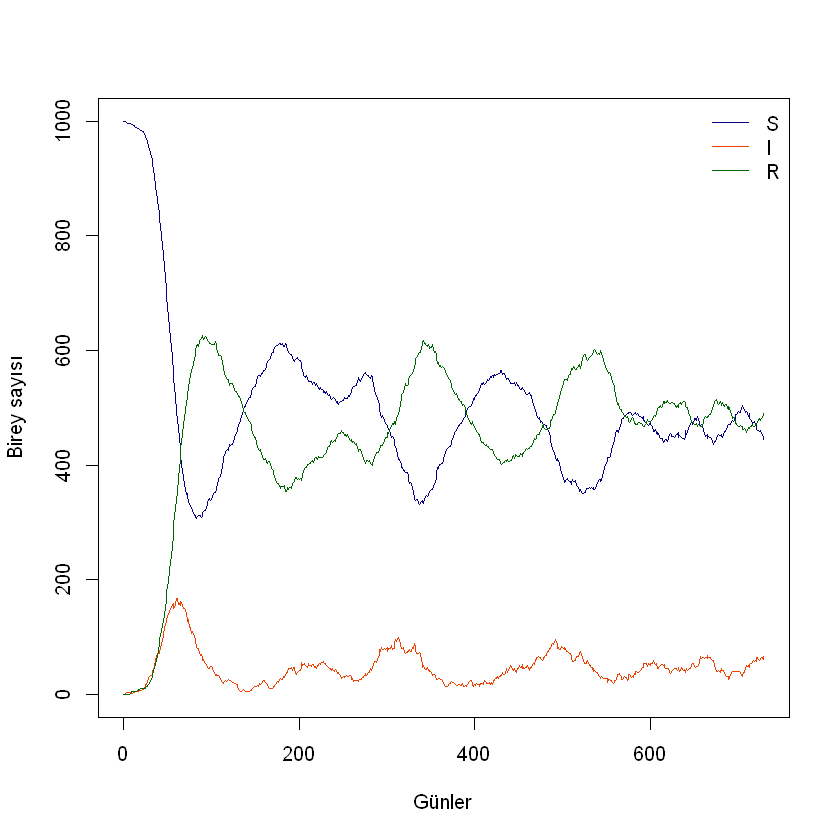

In [5]:
# Parametreleri tanımla 
R0   <- 2 # R0  
gamma<- 1/8 # iyileşme oranı
delta<- 1/90 # Bağışıklık kaybı oranı 
S0   <- 1000 # Zaman 0'da duyarlı popülasyon
I0   <- 1    # Zaman 0'da bulaştırıcı popülasyon

    
# Tanımlı parametrelerle bir "sir" model nesnesi oluştur   
sir <- sir_generator$new(
  S_ini = S0,
  I_ini = I0,
  R0    = R0,
  gamma = gamma,
  delta = delta)

# Rasgele sayı üretimi için tohum ayarla (R standardı)
set.seed(1)

# SIR modelimizi iki yıllık bir süre için çalıştır (günlük adımlarda)
t_end<- 365 * 2
sir_res <- sir$run(0:t_end)

# Modelimizi çiz

sir_col <- c("Navyblue", "orangered2", "darkgreen") # Grafik renkleri

days <- sir_res[, 1] # grafiğimiz için zaman vektörünü tanımla 

matplot(days, sir_res[, -1], xlab = "Günler", ylab = "Birey sayısı",
        type = "l", col = sir_col, lty = 1)
legend("topright", lwd = 1, col = sir_col, legend = c("S", "I", "R"), bty = "n")


Stokastik bir süreç tanıttığımız için, her model çalışması farklı olacaktır. Sonuçların nasıl değiştiğini görmek için aynı kodu birkaç kez çalıştırmayı deneyin.

Salgın kalıcılığı üzerine dersimizden, yok olma olasılığının daha muhtemel hale geldiği bir eşiği kabaca tahmin edebileceğimizi hatırlayabilirsiniz.

3.  Aşağıdaki kodda o eşiği tanımlamaya çalışın ve enfeksiyonlarınızın bu eşiğe karşı çizildiğini görmek için modelinizi tekrar çizin

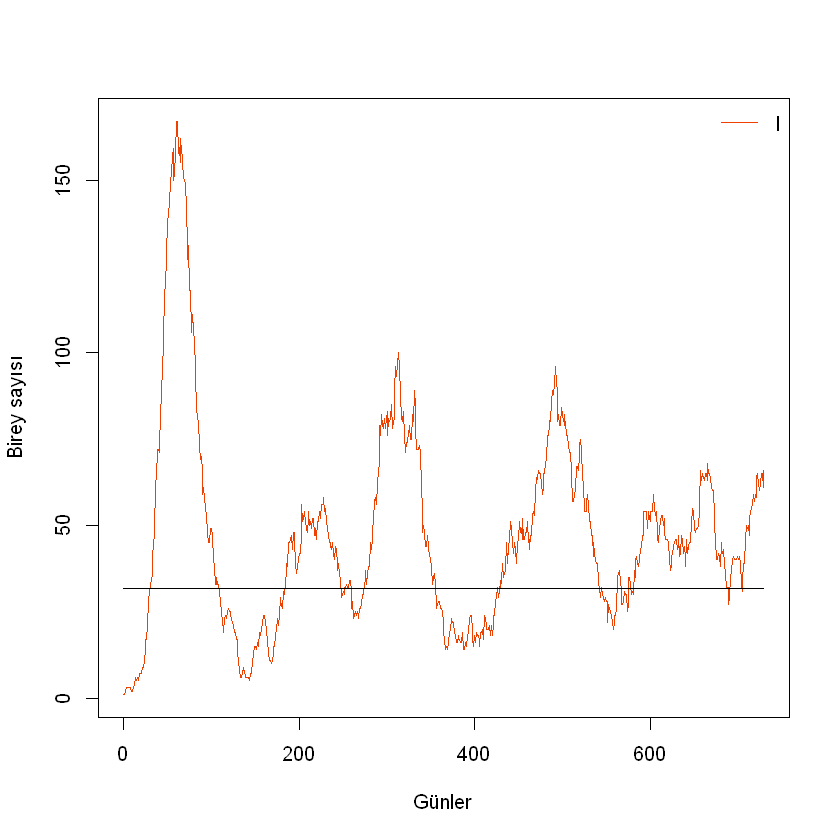

In [6]:
# Bir eşik tanımla

Y_limit <- sqrt(1001) # İpucu ders slaytlarına bak 

# Modelimizi çiz

sir_col <- c("Navyblue", "orangered2", "darkgreen") # Grafik renkleri

days <- sir_res[, 1] # grafiğimiz için zaman vektörünü tanımla 

matplot(days, sir_res[, 3], xlab = "Günler", ylab = "Birey sayısı",
        type = "l", col = "orangered2", lty = 1)
lines(c(0,365*2),c(Y_limit,Y_limit), col="black")
legend("topright", lwd = 1, col = "Orangered2", legend = c("I"), bty = "n")


4.  Zaman içinde enfeksiyonların eğilimi hakkında ne söyleyebilirsiniz?

    **Cevap: Enfeksiyonların büyük bir ilk zirvesi ve ardından daha küçük zirveleri var**

5.  Bu analizi R0 = 1.1 ve R0 = 4 değerleri için yeniden üretmeyi deneyin. Ne gözlemliyorsunuz?
    **Cevap: R0=1.1 için**

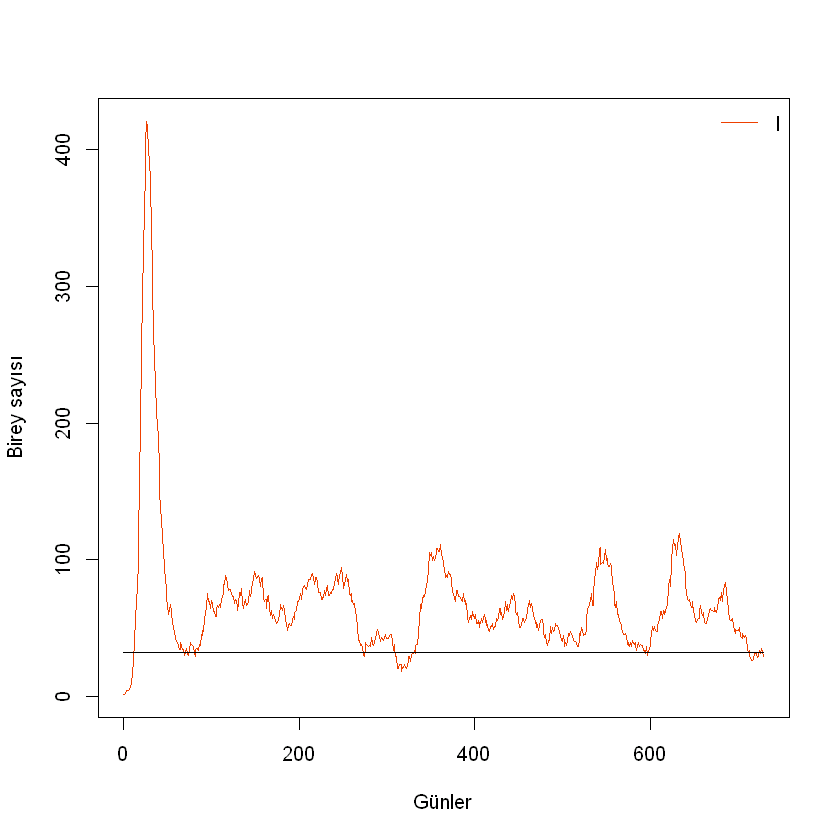

In [7]:
 # Parametreleri tanımla 
    R0   <- 4 # R0  
    gamma<- 1/8 # iyileşme oranı
    delta<- 1/90 # Bağışıklık kaybı oranı 
    S0   <- 1000 # Zaman 0'da duyarlı popülasyon
    I0   <- 1    # Zaman 0'da bulaştırıcı popülasyon

        
    # Tanımlı parametrelerle bir "sir" model nesnesi oluştur   
    sir <- sir_generator$new(
      S_ini = S0,
      I_ini = I0,
      R0    = R0,
      gamma = gamma,
      delta = delta)

    # Rasgele sayı üretimi için tohum ayarla (R standardı)
    set.seed(1)

    # SIR modelimizi iki yıllık bir süre için çalıştır (günlük adımlarda)
    t_end<- 365 * 2
    sir_res <- sir$run(0:t_end)

    # Bir eşik tanımla

    Y_limit <- sqrt(1001) # İpucu ders slaytlarına bak 

    # Modelimizi çiz

    sir_col <- c("Navyblue", "orangered2", "darkgreen") # Grafik renkleri

    days <- sir_res[, 1] # grafiğimiz için zaman vektörünü tanımla 

    matplot(days, sir_res[, 3], xlab = "Günler", ylab = "Birey sayısı",
            type = "l", col = "orangered2", lty = 1)
    lines(c(0,365*2),c(Y_limit,Y_limit), col="black")
    legend("topright", lwd = 1, col = "Orangered2", legend = c("I"), bty = "n")


6.  R0=2 kullanarak, delta değerini ortalama 1 yıllık bağışıklık kaybı varsaymak için değiştirebilir misiniz? Ne gözlemliyorsunuz ve böyle bir davranışı açıklayabilir misiniz?

    **Cevap: 1 yıllık bağışıklık kaybı, yeni bir salgın zirvesi oluşturacak kadar büyük duyarlı bir popülasyonu sürdürmek için çok uzun.**

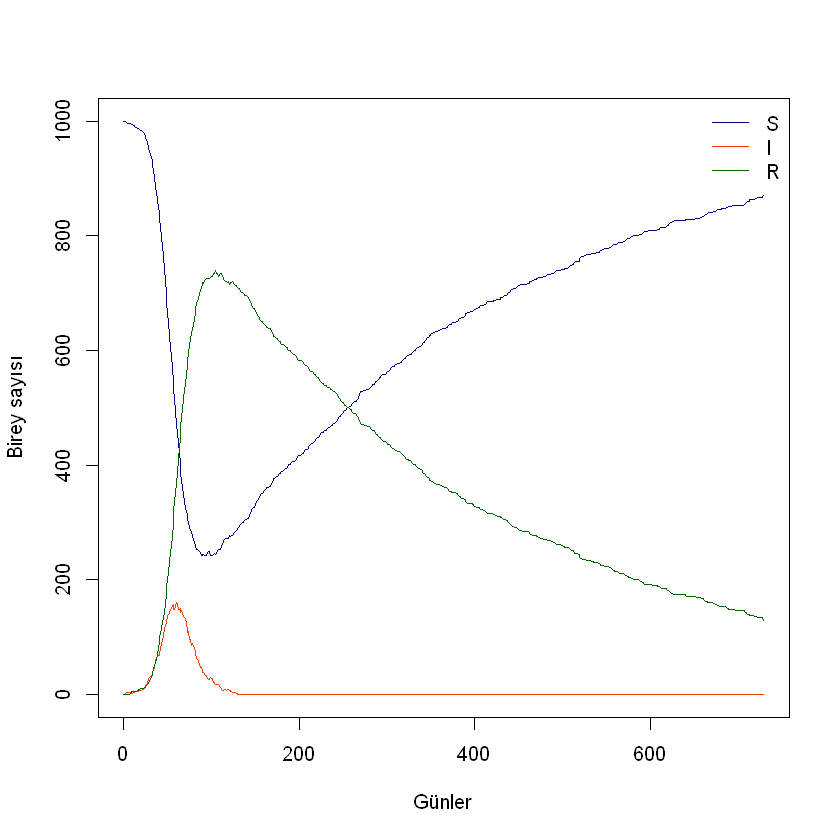

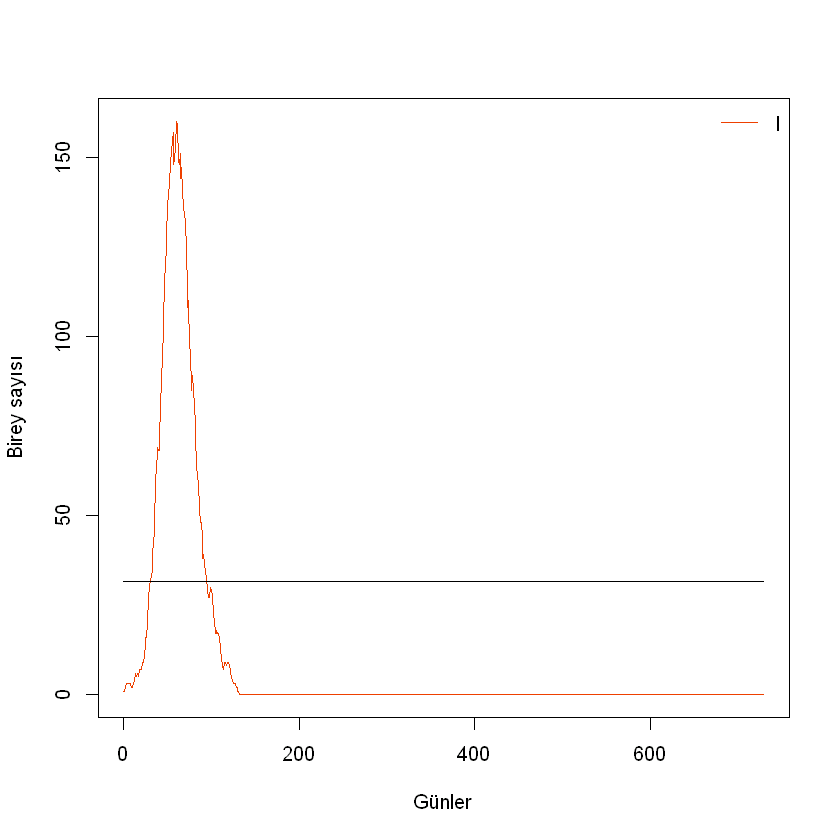

In [8]:
# Parametreleri tanımla 
    R0   <- 2 # R0  
    gamma<- 1/8 # iyileşme oranı
    delta<- 1/365 # Bağışıklık kaybı oranı 
    S0   <- 1000 # Zaman 0'da duyarlı popülasyon
    I0   <- 1    # Zaman 0'da bulaştırıcı popülasyon

        
    # Tanımlı parametrelerle bir "sir" model nesnesi oluştur   
    sir <- sir_generator$new(
      S_ini = S0,
      I_ini = I0,
      R0    = R0,
      gamma = gamma,
      delta = delta)

    # Rasgele sayı üretimi için tohum ayarla (R standardı)
    set.seed(1)

    # SIR modelimizi iki yıllık bir süre için çalıştır (günlük adımlarda)
    t_end<- 365 * 2
    sir_res <- sir$run(0:t_end)

    # çiz
    sir_col <- c("Navyblue", "orangered2", "darkgreen") # Grafik renkleri

    days <- sir_res[, 1] # grafiğimiz için zaman vektörünü tanımla 

    matplot(days, sir_res[, -1], xlab = "Günler", ylab = "Birey sayısı",
            type = "l", col = sir_col, lty = 1)
    legend("topright", lwd = 1, col = sir_col, legend = c("S", "I", "R"), bty = "n")



    # Bir eşik tanımla

    Y_limit <- sqrt(1001) # İpucu ders slaytlarına bak 

    # Modelimizi çiz

    sir_col <- c("Navyblue", "orangered2", "darkgreen") # Grafik renkleri

    days <- sir_res[, 1] # grafiğimiz için zaman vektörünü tanımla 

    matplot(days, sir_res[, 3], xlab = "Günler", ylab = "Birey sayısı",
            type = "l", col = "orangered2", lty = 1)
    lines(c(0,365*2),c(Y_limit,Y_limit), col="black")
    legend("topright", lwd = 1, col = "Orangered2", legend = c("I"), bty = "n")


*Odin* paketinin bir kez de birçok eşzamanlı gerçekleştirmeyi aynı anda çalıştırma özelliğini kullanabiliriz.

7.  Aşağıdaki kodda modelimizi 100 kez çalıştıracağız ve sonuçlarını çizeceğiz (çalıştırmadan önce, modeli R0=2'ye ve bağışıklık kaybını 90 güne geri ayarlayın)

In [9]:
# Parametreleri tanımla 
R0   <- 2 # R0  
gamma<- 1/8 # iyileşme oranı
delta<- 1/90 # Bağışıklık kaybı oranı 
S0   <- 1000 # Zaman 0'da duyarlı popülasyon
I0   <- 1    # Zaman 0'da bulaştırıcı popülasyon

    
# Tanımlı parametrelerle bir "sir" model nesnesi oluştur   
sir <- sir_generator$new(
  S_ini = S0,
  I_ini = I0,
  R0    = R0,
  gamma = gamma,
  delta = delta)

# Rasgele sayı üretimi için tohum ayarla (R standardı)
set.seed(1)

# SIR modelimizi iki yıllık bir süre için çalıştır (günlük adımlarda)
t_end<- 365 * 2
sir_res <- sir$run(0:t_end)

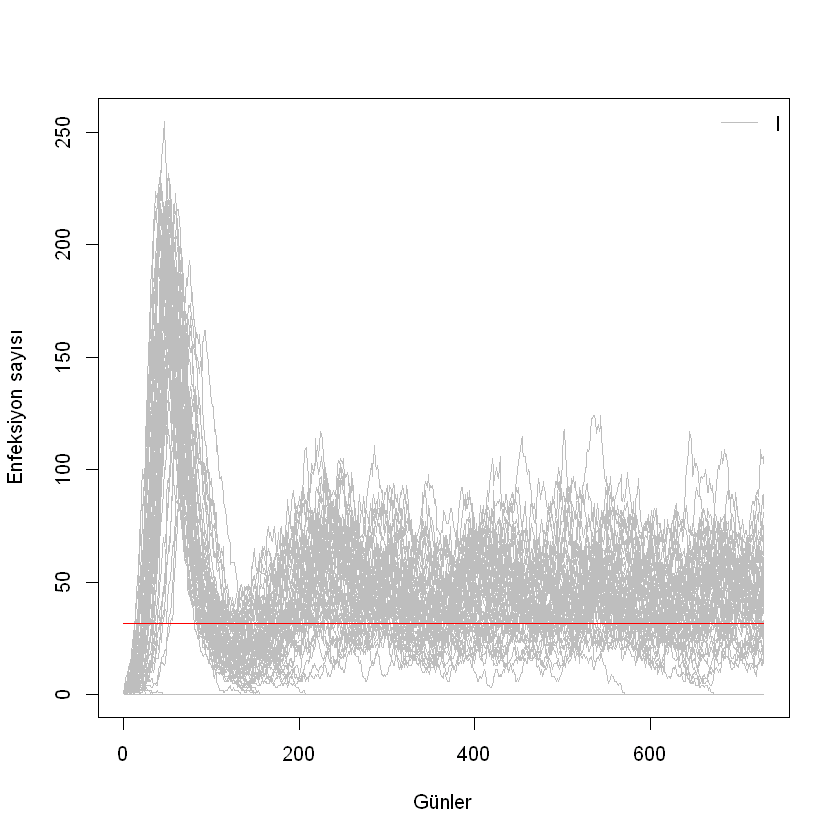

In [10]:
# Modelimizi 100 kez tekrarlamak için replicate kullan
sir_100 <- sir$run(0:t_end, replicate = 100)
# res_200 <- sir$transform_variables(res_200)
# res_200 <- cbind.data.frame(t = res_200[[1]], res_200[-1])

matplot(sir_100[, 1,],sir_100[, 3,], xlab = "Günler", ylab = "Enfeksiyon sayısı",
        type = "l", lty = 1, col="grey")
lines(c(0,t_end),c(Y_limit,Y_limit),type="l", col="red") 
legend("topright", lwd = 1, col = "grey", legend = c("I"), bty = "n")


Aynı model için bir dizi replikatımız veya simülasyonumuz olduğuna göre, mevcut model parametreleri için salgın yok olma olasılığını tahmin edebiliriz. Bunu, simülasyon zamanının sonunda sıfıra eşit olan Enfeksiyon yörüngelerinin kaçının olduğuna bakarak yapabiliriz.

8.  Yok olma olasılığını tahmin etmek için aşağıdaki kodu kullanın.
9.  Model parametrelerinizi R0=4.5'e ve sonra R0 = 1'e değiştirin ve bu değeri yeniden tahmin edin

In [11]:
# Burada p. yok olmasını bulmak için kullanıcı tanımlı bir fonksiyon oluşturuyoruz
prob_extinct<-function(results,t_end){
  
  n_extinct<-length(which(results[t_end,3,]==0)) # sıfırda biten simülasyonları bul
  n_runs   <-length(results[1,1,])
  
  return(prob_extinction=n_extinct/n_runs) 
}

# yeni tanımlanan fonksiyonu çağır, model sonuçları nesnemizi ve zaman uzunluğunu geç
prob_extinct(sir_100,t_end)

[1] 0.49

**Cevap: R0=4.5 için yok olma olasılığı ~%19**

[1] 0.19

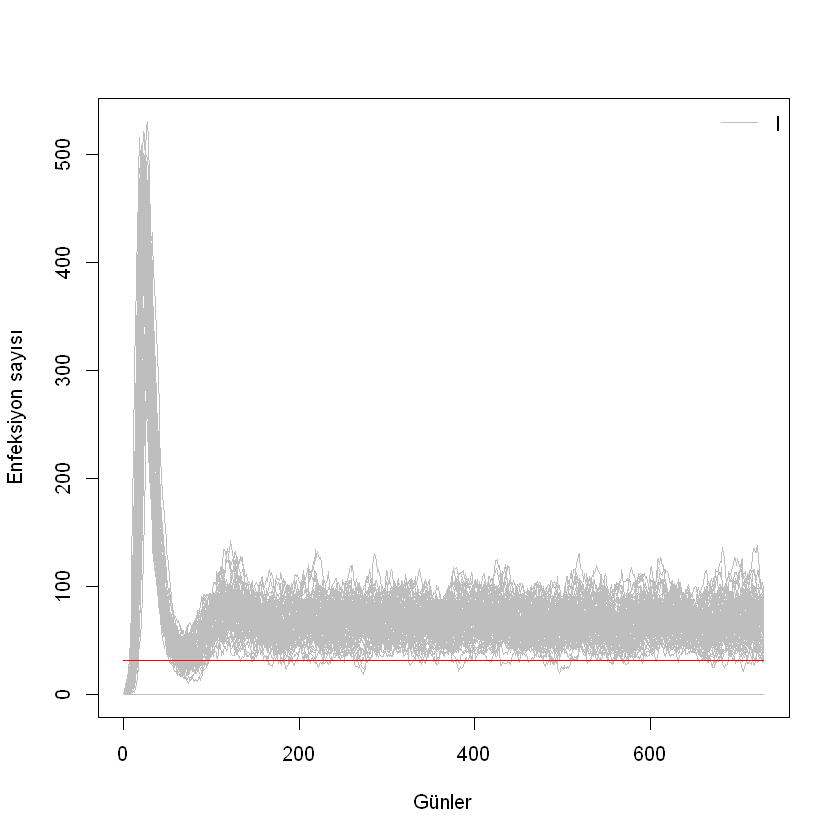

In [12]:
# Parametreleri tanımla 
R0   <- 4.5 # R0  
gamma<- 1/8 # iyileşme oranı
delta<- 1/90 # Bağışıklık kaybı oranı 
S0   <- 1000 # Zaman 0'da duyarlı popülasyon
I0   <- 1    # Zaman 0'da bulaştırıcı popülasyon

    
# Tanımlı parametrelerle bir "sir" model nesnesi oluştur   
sir <- sir_generator$new(
  S_ini = S0,
  I_ini = I0,
  R0    = R0,
  gamma = gamma,
  delta = delta)

# Rasgele sayı üretimi için tohum ayarla (R standardı)
set.seed(1)

# SIR modelimizi iki yıllık bir süre için çalıştır (günlük adımlarda)
t_end<- 365 * 2
sir_res <- sir$run(0:t_end)
# Modelimizi 100 kez tekrarlamak için replicate kullan

sir_100 <- sir$run(0:t_end, replicate = 100)
# res_200 <- sir$transform_variables(res_200)
# res_200 <- cbind.data.frame(t = res_200[[1]], res_200[-1])

matplot(sir_100[, 1,],sir_100[, 3,], xlab = "Günler", ylab = "Enfeksiyon sayısı",
        type = "l", lty = 1, col="grey")
lines(c(0,t_end),c(Y_limit,Y_limit),type="l", col="red") 
legend("topright", lwd = 1, col = "grey", legend = c("I"), bty = "n")

prob_extinct(sir_100,t_end)

**Cevap: R0=1 için yok olma olasılığı ~%100**

[1] 1

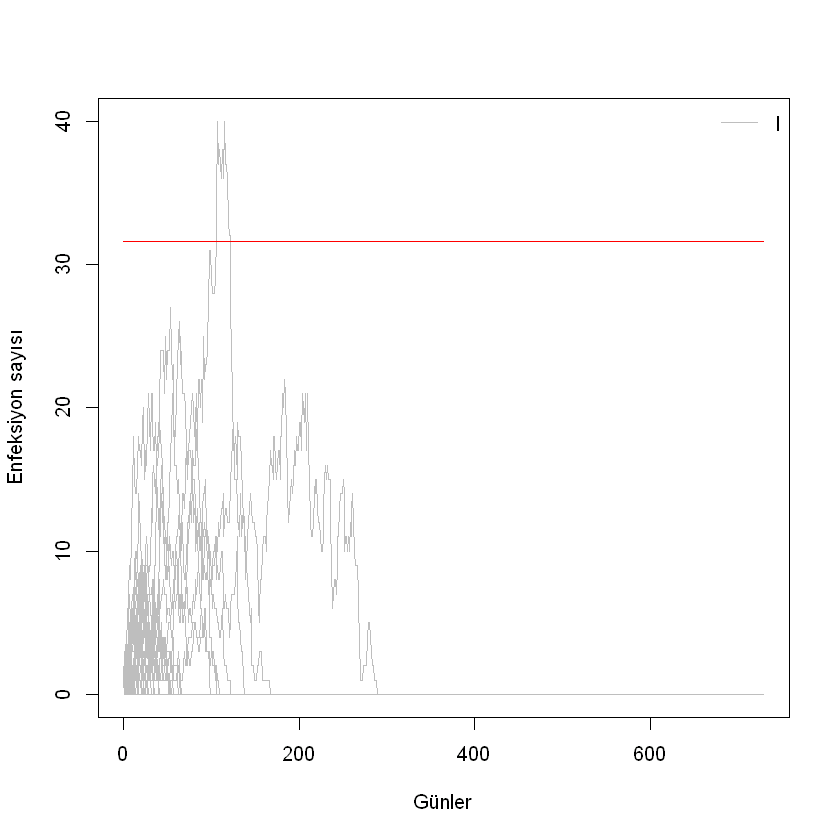

In [13]:
# Parametreleri tanımla 
R0   <- 1 # R0  
gamma<- 1/8 # iyileşme oranı
delta<- 1/90 # Bağışıklık kaybı oranı 
S0   <- 1000 # Zaman 0'da duyarlı popülasyon
I0   <- 1    # Zaman 0'da bulaştırıcı popülasyon

    
# Tanımlı parametrelerle bir "sir" model nesnesi oluştur   
sir <- sir_generator$new(
  S_ini = S0,
  I_ini = I0,
  R0    = R0,
  gamma = gamma,
  delta = delta)

# Rasgele sayı üretimi için tohum ayarla (R standardı)
set.seed(1)

# SIR modelimizi iki yıllık bir süre için çalıştır (günlük adımlarda)
t_end<- 365 * 2
sir_res <- sir$run(0:t_end)
# Modelimizi 100 kez tekrarlamak için replicate kullan

sir_100 <- sir$run(0:t_end, replicate = 100)
# res_200 <- sir$transform_variables(res_200)
# res_200 <- cbind.data.frame(t = res_200[[1]], res_200[-1])

matplot(sir_100[, 1,],sir_100[, 3,], xlab = "Günler", ylab = "Enfeksiyon sayısı",
        type = "l", lty = 1, col="grey")
lines(c(0,t_end),c(Y_limit,Y_limit),type="l", col="red") 
legend("topright", lwd = 1, col = "grey", legend = c("I"), bty = "n")

prob_extinct(sir_100,t_end)